In [1]:
import wrangle
import viz

from skimpy import skim

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import TransformedTargetRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data from a local csv originally obtained from:
#    https://www.kaggle.com/code/desalegngeb/auctioning-used-cars-what-matters-most/data?select=car_prices.csv

df = pd.read_csv('car_prices.csv', error_bad_lines=False, warn_bad_lines=False)

In [3]:
df.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [4]:
df = wrangle.clean_cars(df)

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 513877 │ │ int64       │ 35    │                                                          │
│ │ Number of columns │ 36     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ year                      │   0 │      0 │     2000 │    3.8 │  2000 │   2000 │   2000 │    2000 │   ▁▂▂█  │  │
│ │ condition                 │   0 │      0 │      3.4 │   0.95 │     1 │    2.7 │    4.2 │       5 │  ▄▄▅█▅  │  │
│ │ odometer                  │   0 │      0 │    66000 │  51000 │     1 │  28000 │  96000 │  500000 │   █▃▁   │  │
│ │ mmr                       │   0 │      0 │    14000 │   8700 │    25 │   7500 │  18000 │   77000 │   █▆▁   │  │
│ │ sellingprice              │   0 │      0 │    14000 │   8800 │     1 │   7300 │  18000 │   52000 │  ▆█▄▁   │  │
│ │ saleyear                  │   0 │      0 │     2000 │   0.27 │  2000 │   2000 │   2000 │    2000 │ ▁    █  │  │
│ │ age_at_sale               │   0 │      0 │      4.7 │    3.8 │     1 │      2 │      7 │      25 │   █▂▂   │  │
│ │ miles_per_year            │   0 │      0 │    16000 │   9100 │     0 │  10000 │  20000 │  220000 │    █    │  │
│ │ high_mid_make             │   0 │      0 │     0.55 │    0.5 │     0 │      0 │      1 │       1 │ ▇    █  │  │
│ │ low_mid_make              │   0 │      0 │     0.25 │   0.43 │     0 │      0 │      0 │       1 │ █    ▃  │  │
│ │ luxury_make               │   0 │      0 │     0.18 │   0.39 │     0 │      0 │      0 │       1 │ █    ▂  │  │
│ │ high_state                │   0 │      0 │      0.2 │    0.4 │     0 │      0 │      0 │       1 │ █    ▂  │  │
│ │ mid_state                 │   0 │      0 │      0.7 │   0.46 │     0 │      0 │      1 │       1 │ ▃    █  │  │
│ │ low_color                 │   0 │      0 │    0.058 │   0.23 │     0 │      0 │      0 │       1 │    █    │  │
│ │ mid_color                 │   0 │      0 │     0.34 │   0.47 │     0 │      0 │      1 │       1 │ █    ▄  │  │
│ │ low_interior              │   0 │      0 │   0.0043 │  0.065 │     0 │      0 │      0 │       1 │    █    │  │
│ │ mid_interior              │   0 │      0 │     0.98 │   0.15 │     0 │      1 │      1 │       1 │      █  │  │
│ │ SUV                       │   0 │      0 │     0.26 │   0.44 │     0 │      0 │      1 │       1 │ █    ▃  │  │
│ │ convertible               │   0 │      0 │    0.019 │   0.14 │     0 │      0 │      0 │       1 │    █    │  │
│ │ coupe                     │   0 │      0 │    0.036 │   0.19 │     0 │      0 │      0 │       1 │    █    │  │
│ │ hatchback                 │   0 │      0 │   0.0092 │  0.096 │     0 │      0 │      0 │       1 │    █    │  │
│ │ sedan                     │   0 │      0 │     0.46 │    0.5 │     0 │      0 │      1 │       1 │ █    ▇  │  │
│ │ truck                     │   0 │      0 │    0.086 

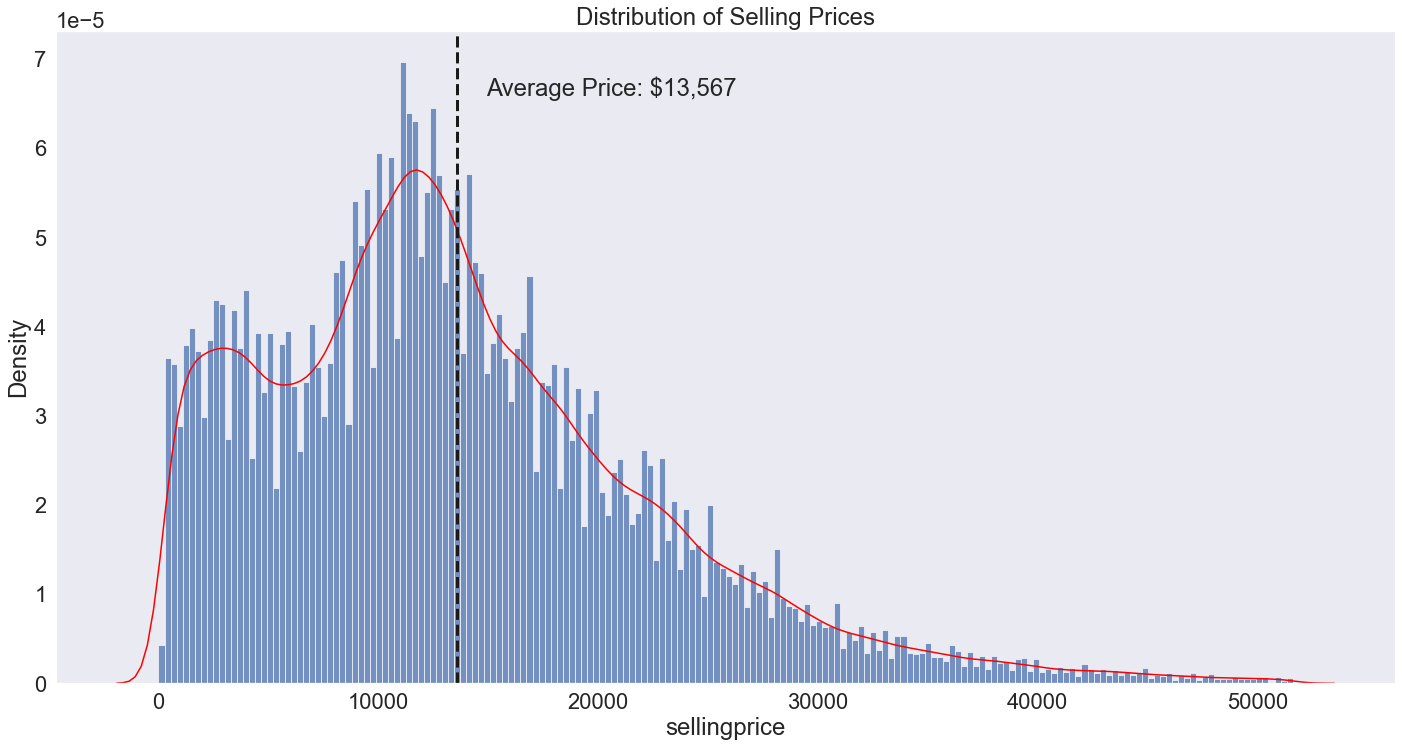

In [6]:
viz.plot_dist(df)

In [7]:
train, validate, test = wrangle.split_cars(df)

In [8]:
X_train = train.drop(columns = 'sellingprice')
X_val = validate.drop(columns= 'sellingprice')
X_test = test.drop(columns='sellingprice')

y_train = train.sellingprice
y_val = validate.sellingprice
y_test = test.sellingprice

In [9]:
# build pipeline
pipeline = Pipeline([('scaler', MinMaxScaler()), ('model', xgb.XGBRegressor(eta=.1,
                                                                           gamma=0,
                                                                           min_child_weight=3,
                                                                           max_depth=6))])

In [10]:
# fit model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eta=0.1,
                              eval_metric=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.100000001, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=3,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_

In [11]:
# predict train and validation set
yhat_train = pipeline.predict(X_train)
yhat_val = pipeline.predict(X_val)

In [12]:
# evaluate
rmse_train = mean_squared_error(y_train, yhat_train, squared=False)
rmse_val = mean_squared_error(y_val, yhat_val, squared=False)
r2_train = r2_score(y_train, yhat_train)
r2_val = r2_score(y_val, yhat_val)
print(f'In-sample RMSE: {rmse_train}, In-sample r2: {r2_train}')
print(f'Out-of-sample RMSE: {rmse_val}, Out-of-sample r2: {r2_val}')

In-sample RMSE: 1348.9458782545728, In-sample r2: 0.976268456104704
Out-of-sample RMSE: 1413.032951871472, Out-of-sample r2: 0.973985476875831
